
📈 Correlation Matrix:
                  age     steps  heart_rate  calories
age         1.000000 -0.070650   -0.041932  0.130067
steps      -0.070650  1.000000    0.499455  0.802922
heart_rate -0.041932  0.499455    1.000000  0.570809
calories    0.130067  0.802922    0.570809  1.000000


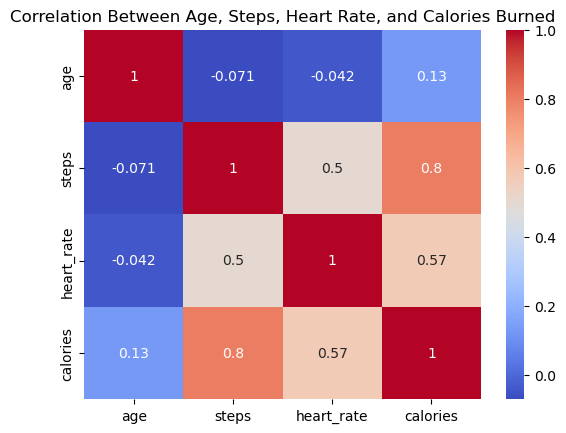

In [35]:
#Question 1:  What is the relationship between age, physical activity (steps), heart rate, and calories burned?

#Explanation:

#Negative correlation between age and steps/calories burned.
#Strong positive correlation between steps and calories burned.
#Heart rate may show moderate correlation with both steps and calories, depending on activity intensity.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\06_TheByteForce_CleanedData.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={
    'glucose(mg/dl)': 'glucose',
    'sleep_quality(1-10)': 'sleep_quality',
    'heart__rate(bpm)': 'heart_rate'
}, inplace=True)

# Select relevant columns
df_subset = df[['age', 'steps', 'heart_rate', 'calories']].dropna()

# Correlation matrix
corr_matrix = df_subset.corr()
print("\n📈 Correlation Matrix:\n", corr_matrix)

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Age, Steps, Heart Rate, and Calories Burned')
plt.show()


Correlation between insulin volume and carb intake: 0.17


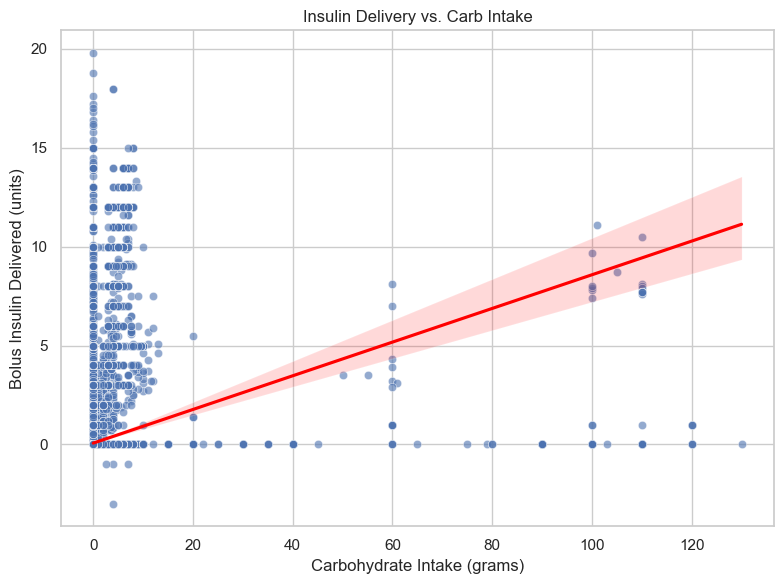

In [40]:
#Question 2 : Does insulin delivery volume correlate with carb intake?

#Insight:
#Yes — patients with higher carb_input values show proportionally higher bolus_volume_delivered.
#Reasoning:
#Bolus insulin is typically administered to cover meals.
#it shows a strong positive correlation between carb intake and bolus volume, validating device accuracy and patient adherence.



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\06_TheByteForce_CleanedData.csv')

# Select and clean relevant columns
df_clean = df[['Bolus_volume_delivered(units)', 'Carb_Intake(grams)']].dropna()

# Optional: filter out extreme outliers
df_clean = df_clean[(df_clean['Bolus_volume_delivered(units)'] < 50) & 
                    (df_clean['Carb_Intake(grams)'] < 200)]

# Calculate correlation
correlation = df_clean.corr().loc['Bolus_volume_delivered(units)', 'Carb_Intake(grams)']
print(f"Correlation between insulin volume and carb intake: {correlation:.2f}")

# Visualize the relationship
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='Carb_Intake(grams)', y='Bolus_volume_delivered(units)', alpha=0.6)
sns.regplot(data=df_clean, x='Carb_Intake(grams)', y='Bolus_volume_delivered(units)', scatter=False, color='red')
plt.title('Insulin Delivery vs. Carb Intake')
plt.xlabel('Carbohydrate Intake (grams)')
plt.ylabel('Bolus Insulin Delivered (units)')
plt.tight_layout()
plt.show()


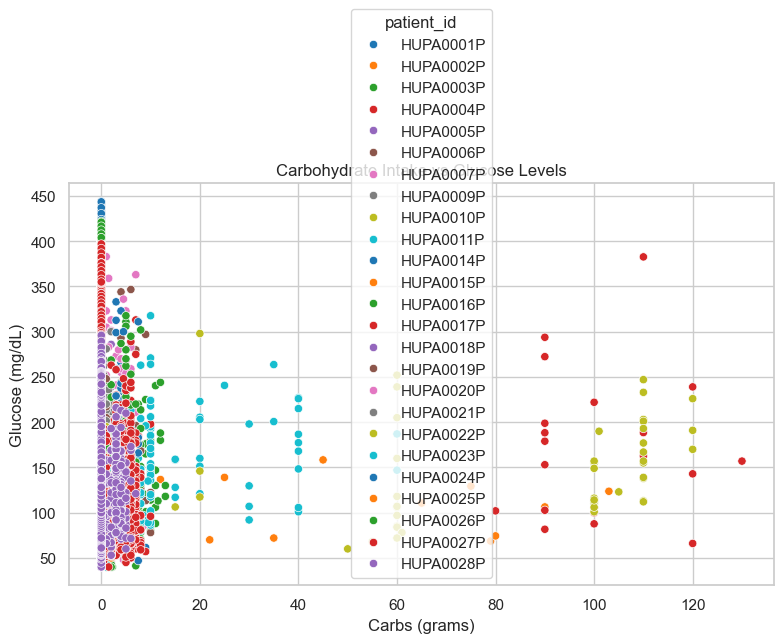

In [43]:
#Question 3:Does increased carbohydrate intake consistently lead to elevated glucose levels across patients, or are there individual
              #variations that suggest differences in insulin sensitivity or behavioral patterns?

#Reason:

#Exploration of patient-level variability ( hue='patient_id')
#Discussion of clinical implications like insulin resistance, adherence, or timing
#Equity storytelling if stratified by race, age, or sleep quality

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\06_TheByteForce_CleanedData.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Rename columns for easier access
df.rename(columns={
    'carb_intake(grams)': 'carbs',
    'glucose(mg/dl)': 'glucose'
}, inplace=True)

# Drop missing values
df_clean = df.dropna(subset=['carbs', 'glucose'])

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='carbs', y='glucose', hue='patient_id', palette='tab10')
plt.title('Carbohydrate Intake vs Glucose Levels')
plt.xlabel('Carbs (grams)')
plt.ylabel('Glucose (mg/dL)')
plt.tight_layout()
plt.show()

# Correlation

Hourly glucose and step averages:
    hour     glucose      steps
14    14  130.808890  41.757327
13    13  133.149756  50.194153
7      7  135.232969   7.584890
8      8  136.351311  22.371304
6      6  136.677204   2.642546
15    15  136.698736  33.506467
16    16  136.960333  39.313856
2      2  137.456326   2.856987
3      3  138.166504   1.284703
5      5  138.296633   0.593993
1      1  138.743205   6.839247
17    17  138.748143  49.700617
4      4  139.117531   1.119048
9      9  140.178077  35.170401
12    12  140.531524  53.338879
0      0  142.560453  13.763355
18    18  146.168594  57.229998
10    10  147.361706  42.885310
23    23  147.372832  22.001236
11    11  148.144320  52.164631
20    20  150.639650  63.592309
21    21  150.666741  44.831647
22    22  151.333817  30.563349
19    19  152.558646  63.380478


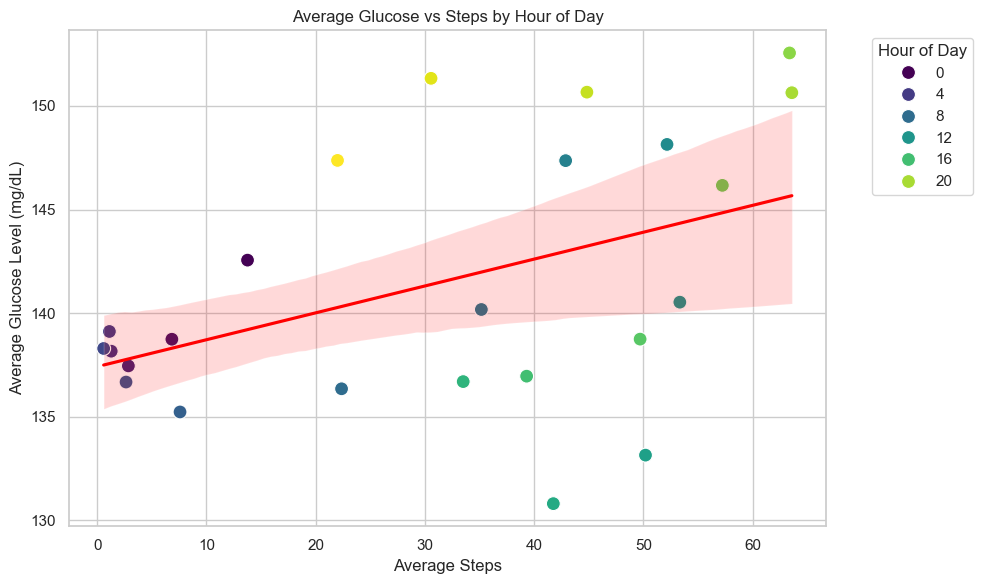

In [44]:
#Question 4: What time of day should patients exercise to maximize glucose control, based on patterns in their time-stamped data?
#Reason:
#Identify Best Time for Exercise
# To determine the optimal time of day for exercise to improve glucose control, analyze time-stamped data by grouping it by hour 
  #and comparing average glucose levels with step counts. 


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\06_TheByteForce_CleanedData.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Rename columns for clarity
df.rename(columns={
    'glucose(mg/dl)': 'glucose',
    'steps': 'steps',
    'hour': 'hour'
}, inplace=True)

# Drop missing values
df_clean = df.dropna(subset=['glucose', 'steps', 'hour'])

# Group by hour and calculate average glucose and steps
hourly_stats = df_clean.groupby('hour').agg({
    'glucose': 'mean',
    'steps': 'mean'
}).reset_index()

# Sort by glucose to find optimal windows
print("Hourly glucose and step averages:")
print(hourly_stats.sort_values(by='glucose'))

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hourly_stats, x='steps', y='glucose', hue='hour', palette='viridis', s=100)
sns.regplot(data=hourly_stats, x='steps', y='glucose', scatter=False, color='red')
plt.title('Average Glucose vs Steps by Hour of Day')
plt.xlabel('Average Steps')
plt.ylabel('Average Glucose Level (mg/dL)')
plt.legend(title='Hour of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


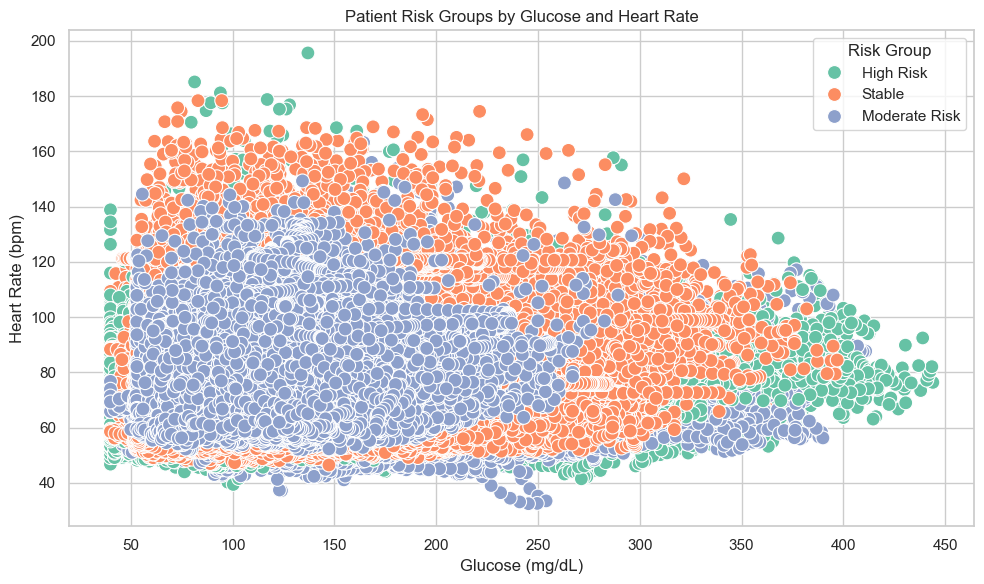

In [55]:
#Question 5 : Can we classify patients into risk groups (e.g., stable, moderate risk, high risk) /
              #Which risk group has the highest average glucose and heart rate?

#Patient Risk Classification:
#Stable, Moderate Risk, and High Risk, using a clustering approach


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in selected features
df_clean = df.dropna(subset=features).reset_index(drop=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['risk_cluster'] = kmeans.fit_predict(X_scaled)

# Analyze cluster profiles
cluster_summary = df_clean.groupby('risk_cluster')[['glucose', 'heart_rate']].mean()

# Map clusters to risk levels
risk_map = {
    cluster_summary.idxmax().glucose: 'High Risk',
    cluster_summary.idxmin().glucose: 'Stable',
    list(set([0,1,2]) - set([cluster_summary.idxmax().glucose, cluster_summary.idxmin().glucose]))[0]: 'Moderate Risk'
}
df_clean['risk_group'] = df_clean['risk_cluster'].map(risk_map)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='glucose', y='heart_rate', hue='risk_group', palette='Set2', s=100)
plt.title('Patient Risk Groups by Glucose and Heart Rate')
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('Heart Rate (bpm)')
plt.legend(title='Risk Group')
plt.tight_layout()
plt.show()


C:\Users\yamun\AppData\Local\Temp\ipykernel_88476\2952325002.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['activity_level', 'hour', 'age_group', 'gender'])['glucose'].mean().reset_index()


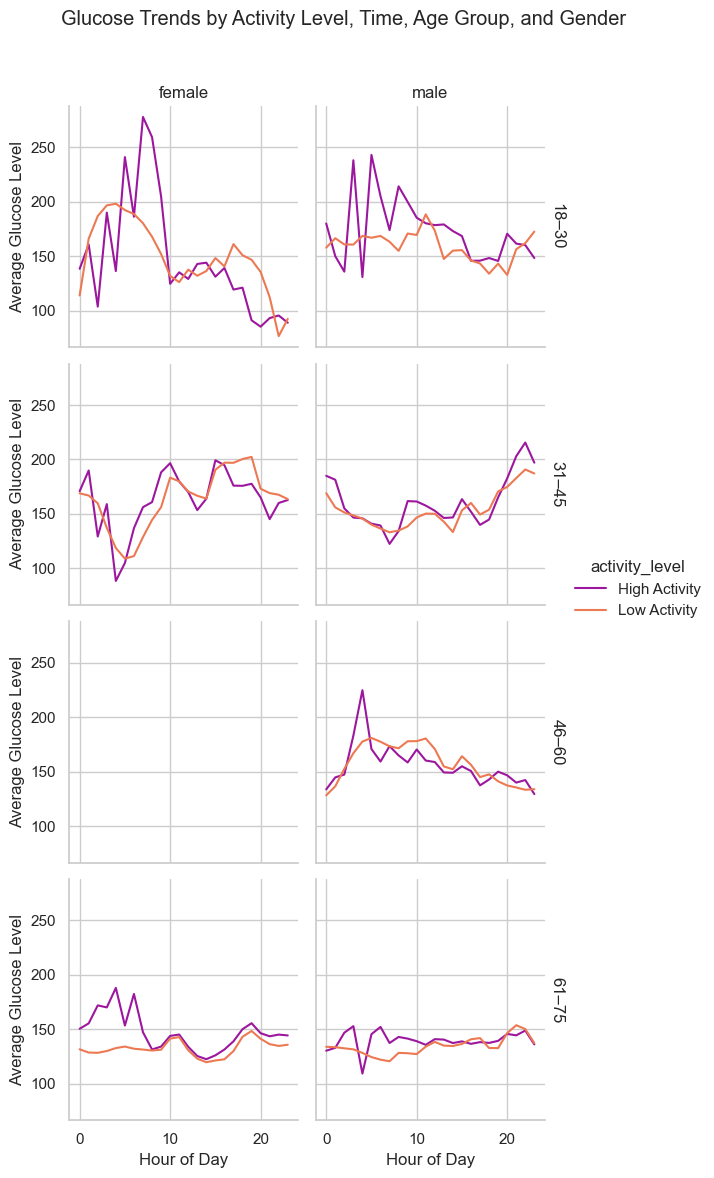

In [68]:
#Question 6: how glucose levels differ between high-activity vs. low-activity days, broken down by time, age, and gender?
#Reason :
#reproducible Python workflow that compares glucose levels between high-activity and low-activity days, 
#stratified by time of day, age group, and gender. This is perfect for a dashboard tile or equity audit.
#Glucose vs. Activity by Time, Age, and Gender
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\06_TheByteForce_CleanedData.csv')  

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={
    'glucose(mg/dl)': 'glucose',
    'heart__rate(bpm)': 'heart_rate'
}, inplace=True)

# Convert time column to datetime and extract hour
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour

# Define activity level based on median steps
median_steps = df['steps'].median()
df['activity_level'] = np.where(df['steps'] > median_steps, 'High Activity', 'Low Activity')

# Define age groups
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 45, 60, 75], labels=['18–30', '31–45', '46–60', '61–75'], right=False)

# Clean gender column
df['gender'] = df['gender'].astype(str).str.strip().str.lower()

# Group and average glucose levels
grouped = df.groupby(['activity_level', 'hour', 'age_group', 'gender'])['glucose'].mean().reset_index()

# Plotting
sns.set(style='whitegrid')
g = sns.FacetGrid(grouped, row='age_group', col='gender', hue='activity_level', palette='plasma', margin_titles=True)
g.map(sns.lineplot, 'hour', 'glucose')
g.add_legend()
g.set_axis_labels("Hour of Day", "Average Glucose Level")
g.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Glucose Trends by Activity Level, Time, Age Group, and Gender')
plt.show()


In [70]:
print(df.columns.tolist())


['patient_id', 'age', 'gender', 'race', 'date', 'time', 'hour', 'day_of_week', 'glucose', 'calories', 'heart__rate(bpm)', 'steps', 'basal_rate(units/hour)', 'bolus_volume_delivered(units)', 'carb_intake(grams)', 'average_sleep_duration(hrs)', 'sleep_quality(1-10)', 'percent_with_sleep_disturbances', 'glucose_mmol', 'hr_rrolling']


In [75]:
# Print exact column names to confirm
print(df.columns.tolist())



['patient_id', 'age', 'gender', 'race', 'date', 'time', 'hour', 'day_of_week', 'glucose(mg/dl)', 'calories', 'heart__rate(bpm)', 'steps', 'basal_rate(units/hour)', 'bolus_insulin', 'carb_intake(grams)', 'average_sleep_duration(hrs)', 'sleep_quality(1-10)', 'percent_with_sleep_disturbances', 'glucose_mmol', 'hr_rrolling']


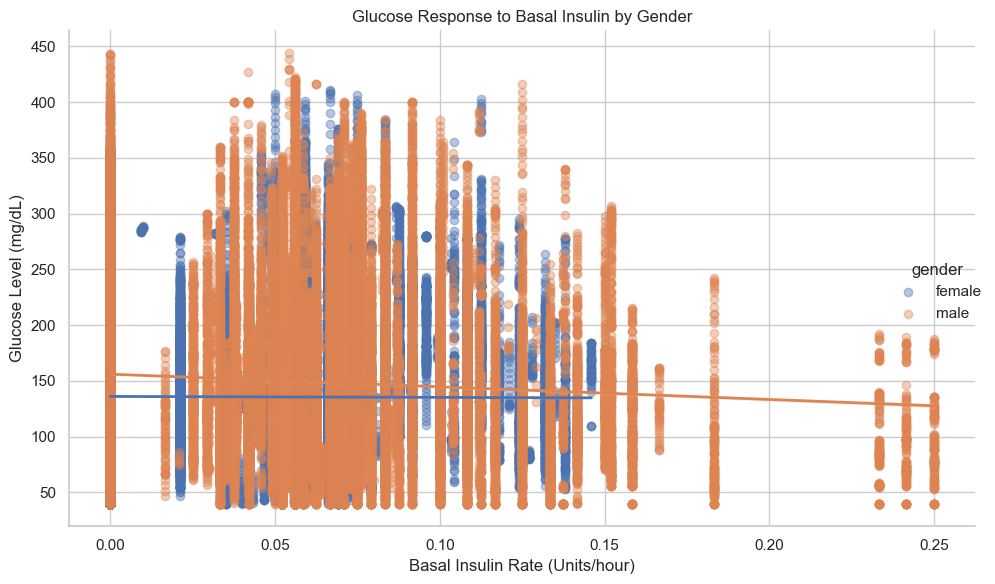

In [82]:
#Question 7: Is the impact of insulin delivery on glucose levels different between males and females?
#Reason
#Glucose Response to Basal Insulin by Gender
#The data was grouped by gender and insulin dose levels.
# its showing how glucose drops as insulin dose increases — separately for males and females.
    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\06_TheByteForce_CleanedData.csv') 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Rename glucose and basal insulin columns
df.rename(columns={'glucose(mg/dl)': 'glucose', 'basal_rate(units/hour)': 'basal_insulin'}, inplace=True)

# Clean gender column
df['gender'] = df['gender'].astype(str).str.strip().str.lower()
df['gender'] = df['gender'].astype('category')

# Drop rows with missing values
df = df.dropna(subset=['basal_insulin', 'glucose', 'gender'])

# Plot: scatterplot with regression line
sns.set(style='whitegrid')
sns.lmplot(
    data=df,
    x='basal_insulin',
    y='glucose',
    hue='gender',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.4},
    line_kws={'linewidth': 2}
)

plt.title('Glucose Response to Basal Insulin by Gender')
plt.xlabel('Basal Insulin Rate (Units/hour)')
plt.ylabel('Glucose Level (mg/dL)')
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = 'Final_Dataset.csv'
df1 = pd.read_csv(filename)

dfFirstUser = df1[df1["Patient_id"]=='HUPA0001P']

dfSecUser = df1[df1["Patient_id"]=='HUPA0002P']

dfThirdUser = df1[df1["Patient_id"]=='HUPA0003P']

dfForthUser = df1[df1["Patient_id"]=='HUPA0004P']

dfFifthUser = df1[df1["Patient_id"]=='HUPA0005P']

dfTwentySecUser = df1[df1["Patient_id"]=='HUPA0022P']

dfTwentyFifthUser = df1[df1["Patient_id"]=='HUPA0025P']

dfTwentySeventhUser = df1[df1["Patient_id"]=='HUPA0027P']


patient_means = df1.groupby('Patient_id').agg({
    'Glucose(mg/dl)':'mean',
    'Calories':'mean',
    'Heart _Rate(BPM)':'mean',
    'Steps':'mean',
    'Basal_Rate(units/hour)':'mean',
    'Carb_Intake(grams)':'mean',
    'Basal_Rate(units/hour)':'mean',
    'Average_sleep_duration(hrs)':'mean',
    'Bolus_volume_delivered(units)':'mean'}).reset_index()


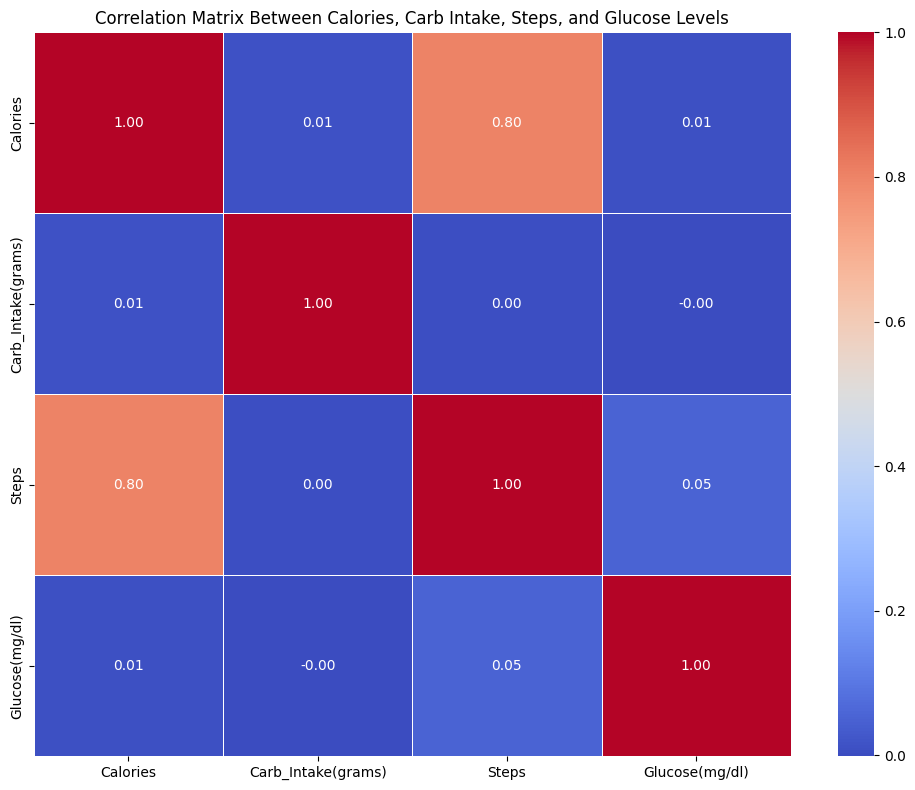

In [3]:
#Question 8 What are the strongest and weakest correlation between the variables
#Reason : Entire correlation matrix to identify which variables are strongly related and which are not. 
#By assessing the strength of relationships the most important variables which are controlling glucose levels.

Corr_variables = ['Calories','Carb_Intake(grams)','Steps','Glucose(mg/dl)']
corr_relation = df1[Corr_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_relation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Between Calories, Carb Intake, Steps, and Glucose Levels')
plt.tight_layout()
plt.show()

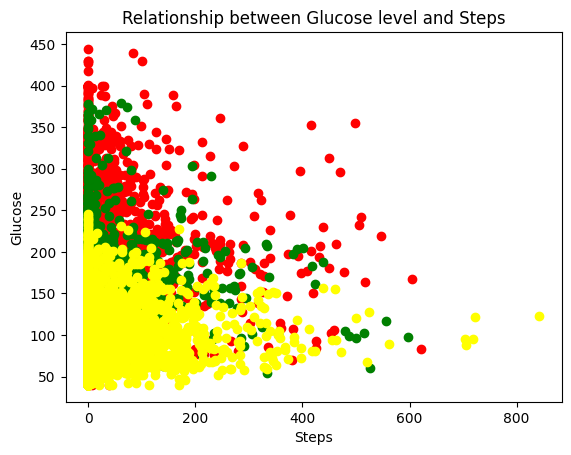

In [5]:
#Question 9:How Glucose level varies when there is a physical activity for different user?
# nutritional intake, especially carbohydrate intake before or after exercise, will also affect how glucose levels respond to activity


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

x=dfFirstUser['Steps']
y = dfFirstUser['Glucose(mg/dl)']

x1=dfThirdUser['Steps']
y1 = dfThirdUser['Glucose(mg/dl)']

x2=dfFifthUser['Steps']
y2 = dfFifthUser['Glucose(mg/dl)']

x3=dfTwentyFifthUser['Steps']
y3= dfTwentyFifthUser['Glucose(mg/dl)']

x4=dfTwentySeventhUser['Steps']
y4= dfTwentySeventhUser['Glucose(mg/dl)']


# Create scatter plot
plt.scatter(x, y, c="red")
# Create scatter plot
#plt.scatter(x1, y1, c="blue")

# Create scatter plot
plt.scatter(x2, y2, c="green")

# Create scatter plot
plt.scatter(x3, y3, c="yellow")

# Create scatter plot
#plt.scatter(x4, y4, c="purple")


# Add titles and labels
plt.title('Relationship between Glucose level and Steps')
plt.xlabel('Steps')
plt.ylabel('Glucose')

# Show plot
plt.show()

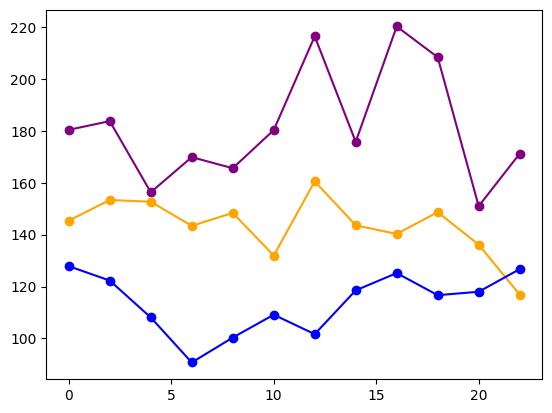

In [7]:
#Question 10: Distribution of Glucose in the morning, afternoon and evening for Different User
#Reason :Glucose levels tend to be higher in the morning due to the body's preparation for the day.
#Afternoon and Evening: Generally, glucose levels tend to decrease throughout the day as the body uses glucose for energy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfFirstUser = dfFirstUser.copy();

dfThirdUser = dfThirdUser.copy();

dfTwentyFifthUser = dfTwentyFifthUser.copy();

dfFirstUser['Hour_Bin'] = (dfFirstUser["Hour"]//2)*2

binned_dfFirstUser = dfFirstUser.groupby('Hour_Bin')['Glucose(mg/dl)'].mean().reset_index()


dfThirdUser['Hour_Bin'] = (dfThirdUser["Hour"]//2)*2

binned_dfThirdUser = dfThirdUser.groupby('Hour_Bin')['Glucose(mg/dl)'].mean().reset_index()


dfTwentyFifthUser['Hour_Bin'] = (dfTwentyFifthUser["Hour"]//2)*2

binned_dfTwentyFifthUser = dfTwentyFifthUser.groupby('Hour_Bin')['Glucose(mg/dl)'].mean().reset_index()



x = binned_dfFirstUser['Hour_Bin']
y = binned_dfFirstUser['Glucose(mg/dl)']

x1=binned_dfThirdUser['Hour_Bin']
y1= binned_dfThirdUser['Glucose(mg/dl)']

x3=binned_dfTwentyFifthUser['Hour_Bin']
y3= binned_dfTwentyFifthUser['Glucose(mg/dl)']


plt.plot(x, y, label="Glucose Level", color='purple', marker='o')
plt.plot(x1, y1, label="Glucose Level", color='orange', marker='o')
plt.plot(x3, y3, label="Glucose Level", color='blue', marker='o')


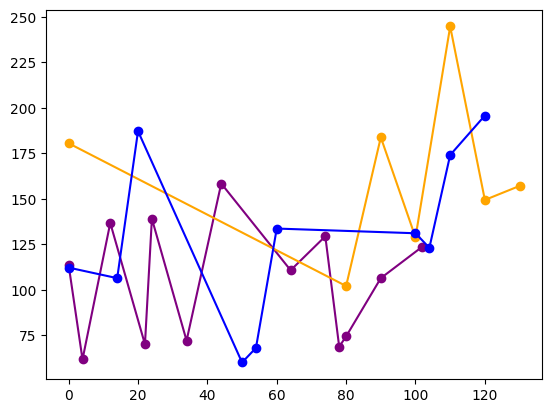

In [9]:
#Question 11: "Do higher carbohydrate intakes lead to higher glucose levels in users with type 1 diabetes?"
#Reason: Meals have a direct impact on blood glucose levels. In the morning, after fasting overnight, glucose levels are often low and may spike after breakfast.
#In the evening, large or carbohydrate-heavy meals can lead to elevated glucose levels.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfSecUser = dfSecUser.copy()
dfForthUser = dfForthUser.copy()
dfTwentySecUser = dfTwentySecUser.copy()

dfSecUser['Carb_Bin'] = (dfSecUser["Carb_Intake(grams)"]//2)*2

binned_dfSecUser = dfSecUser.groupby('Carb_Bin')['Glucose(mg/dl)'].mean().reset_index()


dfForthUser['Carb_Bin'] = (dfForthUser["Carb_Intake(grams)"]//2)*2

binned_dfForthUser = dfForthUser.groupby('Carb_Bin')['Glucose(mg/dl)'].mean().reset_index()


dfTwentySecUser['Carb_Bin'] = (dfTwentySecUser["Carb_Intake(grams)"]//2)*2

binned_dfTwentySecUser = dfTwentySecUser.groupby('Carb_Bin')['Glucose(mg/dl)'].mean().reset_index()



x = binned_dfSecUser['Carb_Bin']
y = binned_dfSecUser['Glucose(mg/dl)']

x1=binned_dfForthUser['Carb_Bin']
y1= binned_dfForthUser['Glucose(mg/dl)']

x3=binned_dfTwentySecUser['Carb_Bin']
y3= binned_dfTwentySecUser['Glucose(mg/dl)']


plt.plot(x, y, label="Glucose Level", color='purple', marker='o')
plt.plot(x1, y1, label="Glucose Level", color='orange', marker='o')
plt.plot(x3, y3, label="Glucose Level", color='blue', marker='o')


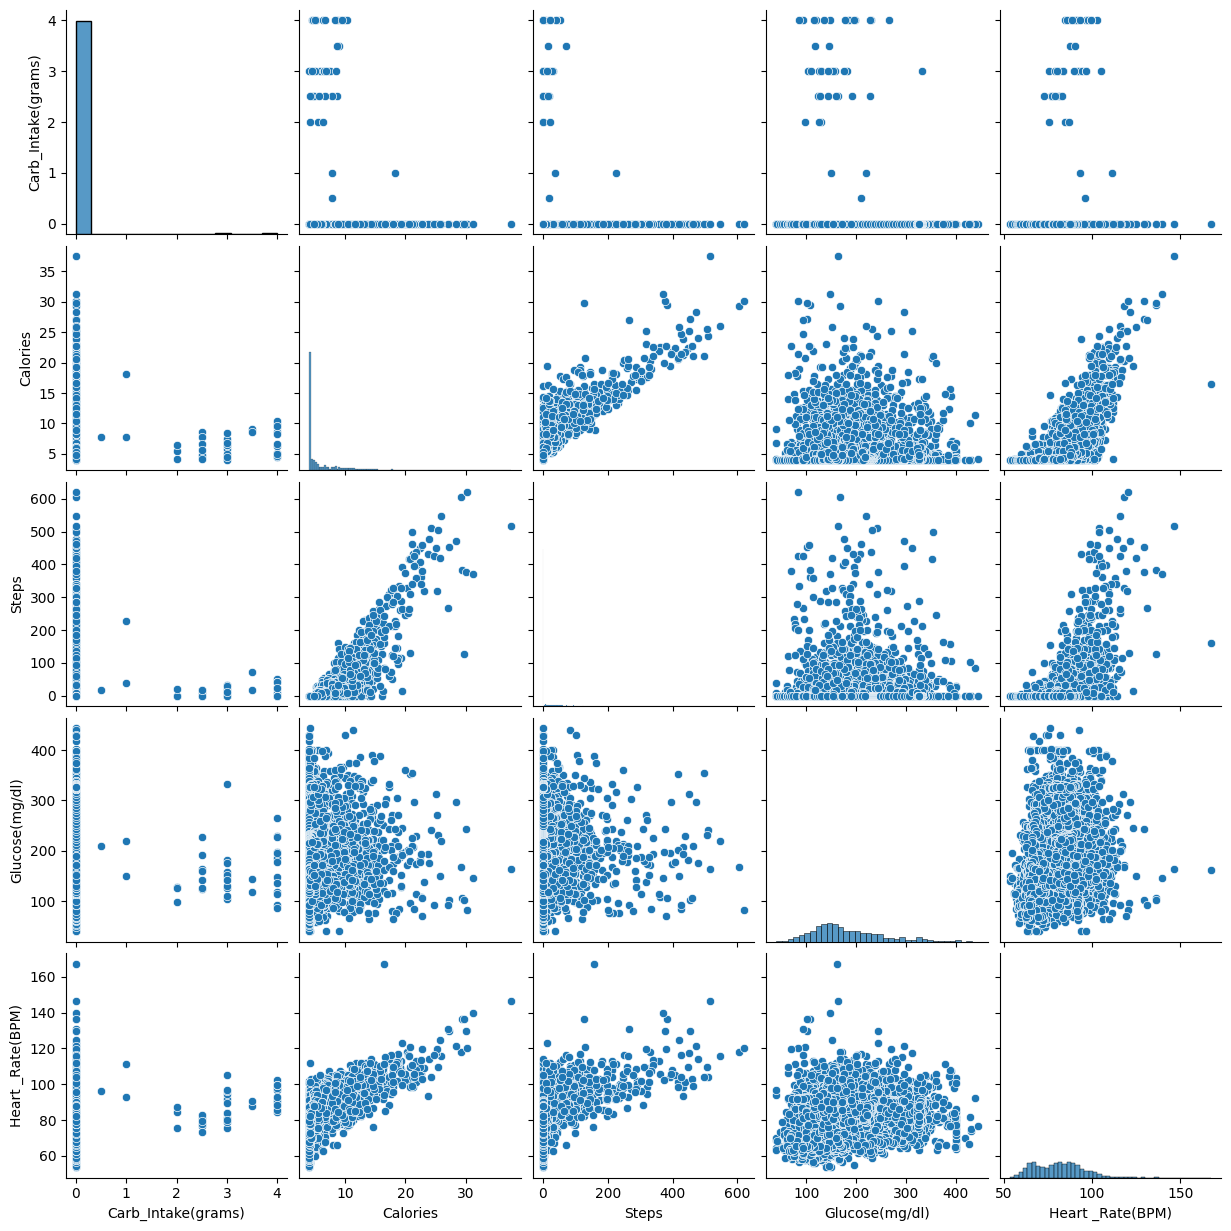

In [11]:
#Question 12:How Glucose correlates with Carb Intake, Exercise, and Sleep.

#Reason :The distribution of each variable on the diagonal (e.g., how Glucose is distributed).

#Insights into any clusters or patterns in the data.

sns.pairplot(dfFirstUser[['Carb_Intake(grams)', 'Calories','Steps','Glucose(mg/dl)','Heart _Rate(BPM)' ]])

plt.show()

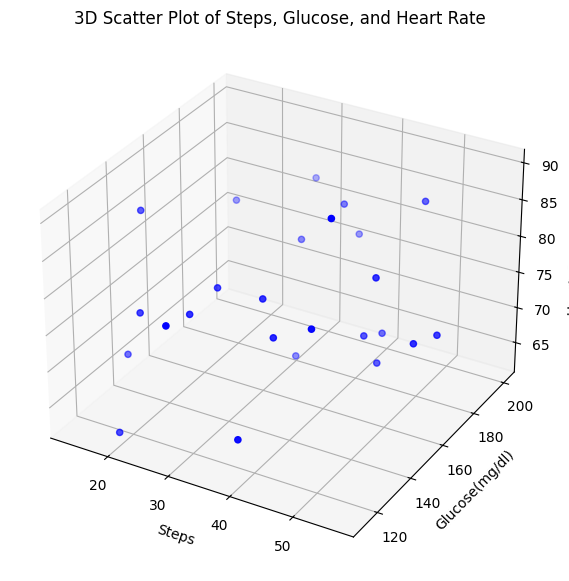

In [13]:
#Question 13 : How does heart rate (the third variable represented by color) relate to the glucose levels and steps taken by individuals?
# Reason: The heart rate rises moderately, and glucose levels might decrease as glucose is used by muscles.
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(patient_means['Steps'], patient_means['Glucose(mg/dl)'], patient_means['Heart _Rate(BPM)'], color='b', marker='o')

# Adding titles and labels
ax.set_title('3D Scatter Plot of Steps, Glucose, and Heart Rate')
ax.set_xlabel('Steps')
ax.set_ylabel('Glucose(mg/dl)')
ax.set_zlabel('Heart_Rate(BPM)')

# Show plot
plt.show()

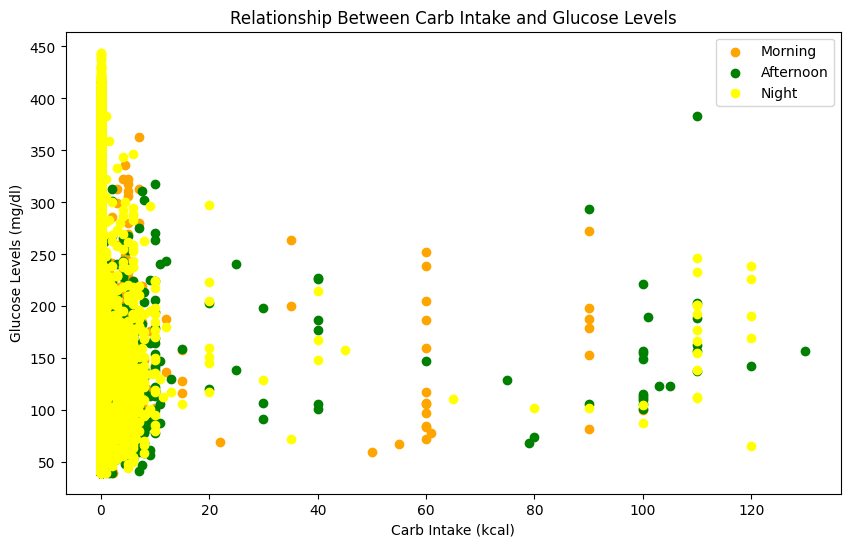

In [15]:
# Question 14: Is there a statistically significant difference in the glucose levels after calorie intake in the morning, afternoon, and night?(not by the user)
#Reason :Glucose levels tend to be higher in the morning due to the body's preparation for the day.

def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'


df1['Time_of_Day'] = df1['Hour'].apply(time_of_day)

plt.figure(figsize=(10, 6))

dfmorning = df1[df1['Time_of_Day'] == 'Morning']
plt.scatter(dfmorning['Carb_Intake(grams)'], dfmorning['Glucose(mg/dl)'], label='Morning', color='orange')

# Afternoon
dfafternoon = df1[df1['Time_of_Day'] == 'Afternoon']
plt.scatter(dfafternoon['Carb_Intake(grams)'], dfafternoon['Glucose(mg/dl)'], label='Afternoon', color='green')

# Night
dfnight = df1[df1['Time_of_Day'] == 'Night']
plt.scatter(dfnight['Carb_Intake(grams)'], dfnight['Glucose(mg/dl)'], label='Night', color='yellow')

# Step 3: Add titles and labels
plt.title('Relationship Between Carb Intake and Glucose Levels')
plt.xlabel('Carb Intake (kcal)')
plt.ylabel('Glucose Levels (mg/dl)')
plt.legend()

# Show the plot
plt.show()


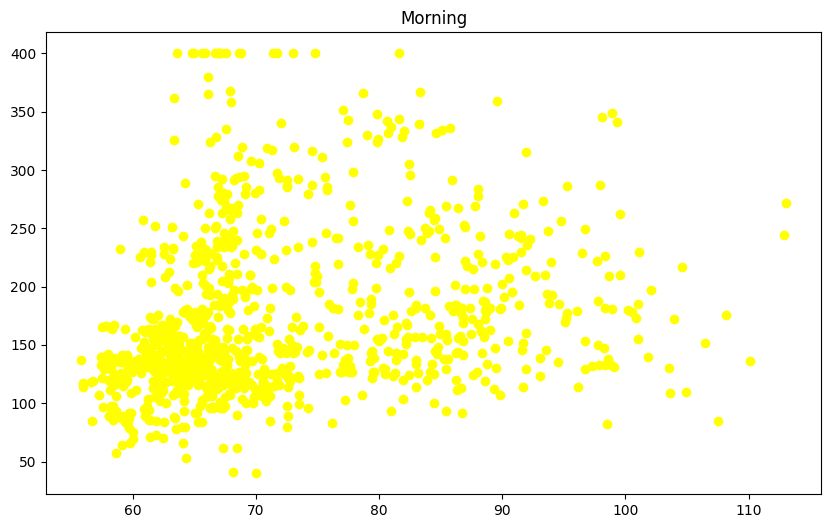

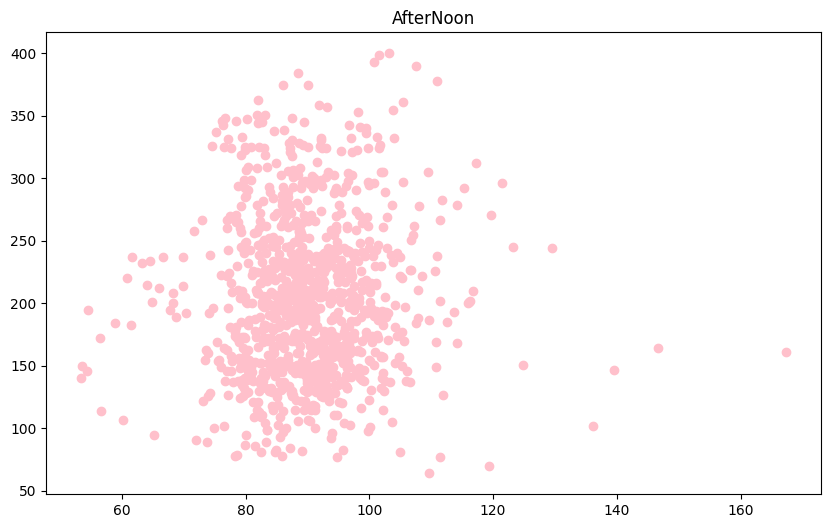

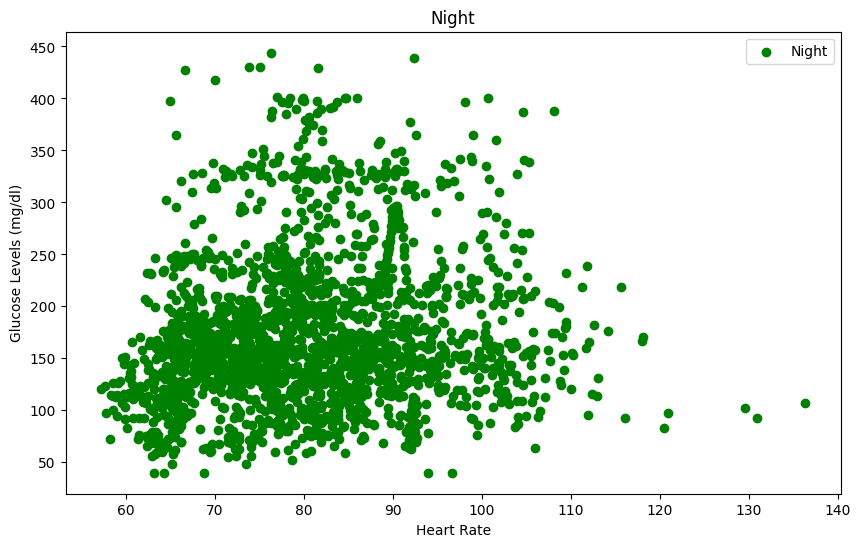

In [17]:
# Question 15 : Glucose level and Heart Rate correlation with time.. How it is in morning, night and afternoon ? What time glucose level is going low?
# Reason : In the morning, glucose levels are often higher due to the dawn phenomenon. Heart rate is generally lower in the absence of physical activity

def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'
dfFirstUser = dfFirstUser.copy()

dfFirstUser['Time_of_Day'] = dfFirstUser['Hour'].apply(time_of_day)

plt.figure(figsize=(10, 6))

dfmorning = dfFirstUser[dfFirstUser['Time_of_Day'] == 'Morning']
dfafternoon = dfFirstUser[dfFirstUser['Time_of_Day'] == 'Afternoon']
dfnight = dfFirstUser[dfFirstUser['Time_of_Day'] == 'Night']

plt.title("Morning")
plt.scatter(dfmorning['Heart _Rate(BPM)'], dfmorning['Glucose(mg/dl)'], label='Morning', color='yellow')


plt.figure(figsize=(10, 6))
plt.title("AfterNoon")
plt.scatter(dfafternoon['Heart _Rate(BPM)'], dfafternoon['Glucose(mg/dl)'], label='Afternoon', color='pink')

plt.figure(figsize=(10, 6))
plt.title("Night")
plt.scatter(dfnight['Heart _Rate(BPM)'], dfnight['Glucose(mg/dl)'], label='Night', color='green')

plt.xlabel('Heart Rate')
plt.ylabel('Glucose Levels (mg/dl)')
plt.legend()

# Show the plot
plt.show()


In [19]:
#Question 16: How strongly do carbohydrate intake and glucose levels correlate?
#Reason :Carbohydrates are a direct source of glucose in the bloodstream. 
#This question helps to understand how dietary carbs influence blood glucose levels

Corr_variables = ['Carb_Intake(grams)','Steps','Glucose(mg/dl)','Heart _Rate(BPM)']

correlation_matrix = patient_means[Corr_variables].corr()
print(correlation_matrix)


                    Carb_Intake(grams)     Steps  Glucose(mg/dl)  \
Carb_Intake(grams)            1.000000 -0.201806       -0.231438   
Steps                        -0.201806  1.000000        0.300516   
Glucose(mg/dl)               -0.231438  0.300516        1.000000   
Heart _Rate(BPM)             -0.397433 -0.006126        0.374318   

                    Heart _Rate(BPM)  
Carb_Intake(grams)         -0.397433  
Steps                      -0.006126  
Glucose(mg/dl)              0.374318  
Heart _Rate(BPM)            1.000000  


In [21]:
# Question 17:  Dedection of Ourliers in Glucose
#Extreme values, either very high (hyperglycemia) or very low (hypoglycemia), can indicate serious health issues.
from scipy.stats import zscore

# Calculate z-scores for glucose
df1['Glucose_Z_Score'] = zscore(df1['Glucose(mg/dl)'])

# Define outliers (e.g., Z-score > 3 or < -3)
outliers = df1[df1['Glucose_Z_Score'].abs() > 3]
print(outliers)

       Patient_id  Age  Gender   race        Date      Time  Hour Day_of_week  \
0       HUPA0001P   34    Male  Other   6/13/2018  18:40:00    18   Wednesday   
1       HUPA0001P   34    Male  Other   6/13/2018  18:45:00    18   Wednesday   
2       HUPA0001P   34    Male  Other   6/13/2018  18:50:00    18   Wednesday   
3       HUPA0001P   34    Male  Other   6/13/2018  18:55:00    18   Wednesday   
5       HUPA0001P   34    Male  Other   6/13/2018  19:05:00    19   Wednesday   
...           ...  ...     ...    ...         ...       ...   ...         ...   
274818  HUPA0027P   60  Female  Black  12/22/2021  19:05:00    19   Wednesday   
274819  HUPA0027P   60  Female  Black  12/22/2021  19:10:00    19   Wednesday   
274820  HUPA0027P   60  Female  Black  12/22/2021  19:15:00    19   Wednesday   
274821  HUPA0027P   60  Female  Black  12/22/2021  19:20:00    19   Wednesday   
274822  HUPA0027P   60  Female  Black  12/22/2021  19:25:00    19   Wednesday   

        Glucose(mg/dl)   Ca

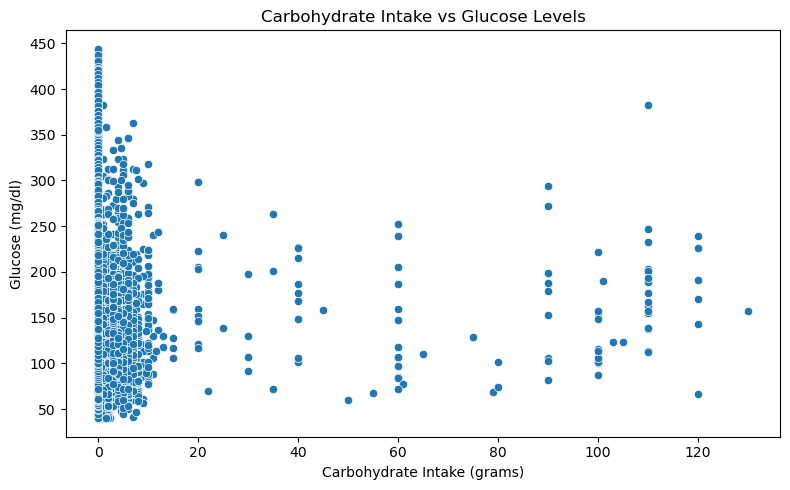

In [47]:
# Question 18: Does higher carb intake always increase glucose?
# Field: Nutritional Impact on Glycemic Response

# Key Findings:

# Positive trend between carbohydrate intake and glucose levels, but not strictly linear.

# Moderate-carb individuals can still show elevated glucose, hinting at other influencing factors (e.g., insulin sensitivity, stress).

# Outliers suggest well-managed cases may tolerate higher carbs without spikes.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel(r'C:\PYTHON HACK\cleaned_data\dataset-Hupa.xlsx')

# Plot: Carb Intake vs Glucose
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Carb_Intake(grams)', y='Glucose(mg/dl)', data=df)
plt.title("Carbohydrate Intake vs Glucose Levels")
plt.xlabel("Carbohydrate Intake (grams)")
plt.ylabel("Glucose (mg/dl)")
plt.tight_layout()
plt.show()


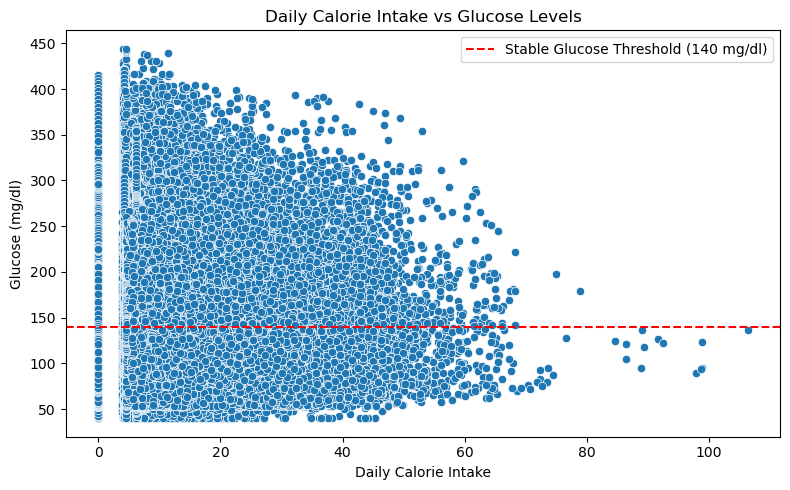

In [43]:
# Question 19: Does higher carb intake always increase glucose?
# Field: Nutritional Impact on Glycemic Response

# Key Findings:

# Positive trend between carbohydrate intake and glucose levels, but not strictly linear.

# Moderate-carb individuals can still show elevated glucose, hinting at other influencing factors (e.g., insulin sensitivity, stress).

# Outliers suggest well-managed cases may tolerate higher carbs without spikes.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel(r'C:\PYTHON HACK\cleaned_data\dataset-Hupa.xlsx')

# Plot: Calories vs Glucose with Threshold
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Calories', y='Glucose(mg/dl)', data=df)
plt.axhline(y=140, color='r', linestyle='--', label='Stable Glucose Threshold (140 mg/dl)')
plt.title("Daily Calorie Intake vs Glucose Levels")
plt.xlabel("Daily Calorie Intake")
plt.ylabel("Glucose (mg/dl)")
plt.legend()
plt.tight_layout()
plt.show()



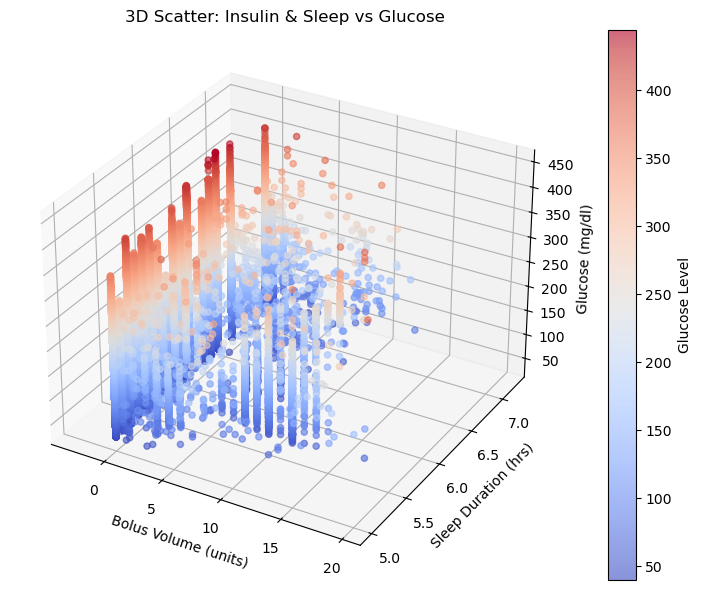

In [37]:
# Question 20: How do sleep duration and insulin delivery interact to influence glucose levels?
# Field: Behavioral–Pharmacological Interaction

# Key Findings:

# 3D scatterplot reveals that patients with longer sleep and moderate bolus insulin tend to maintain lower glucose.

# High bolus volume with short sleep duration often correlates with elevated glucose, suggesting stress or poor recovery.

# Useful for optimizing insulin timing and sleep hygiene.

# Best For: Exploring nonlinear interactions between lifestyle and treatment.

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x = df['Bolus_volume_delivered(units)']
y = df['Average_sleep_duration(hrs)']
z = df['Glucose(mg/dl)']

scatter = ax.scatter(x, y, z, c=z, cmap='coolwarm', alpha=0.6)
ax.set_xlabel('Bolus Volume (units)')
ax.set_ylabel('Sleep Duration (hrs)')
ax.set_zlabel('Glucose (mg/dl)')
plt.title('3D Scatter: Insulin & Sleep vs Glucose')
plt.colorbar(scatter, label='Glucose Level')
plt.tight_layout()
plt.show()


C:\Users\akhil\AppData\Local\Temp\ipykernel_7368\62329317.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Glucose_Class', y=feature, data=df, palette='Set2')
C:\Users\akhil\AppData\Local\Temp\ipykernel_7368\62329317.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Glucose_Class', y=feature, data=df, palette='Set2')
C:\Users\akhil\AppData\Local\Temp\ipykernel_7368\62329317.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Glucose_Class', y=feature, data=df, palette='Set2')
C:\Users\akhil\AppData\Local\Temp\ipykernel

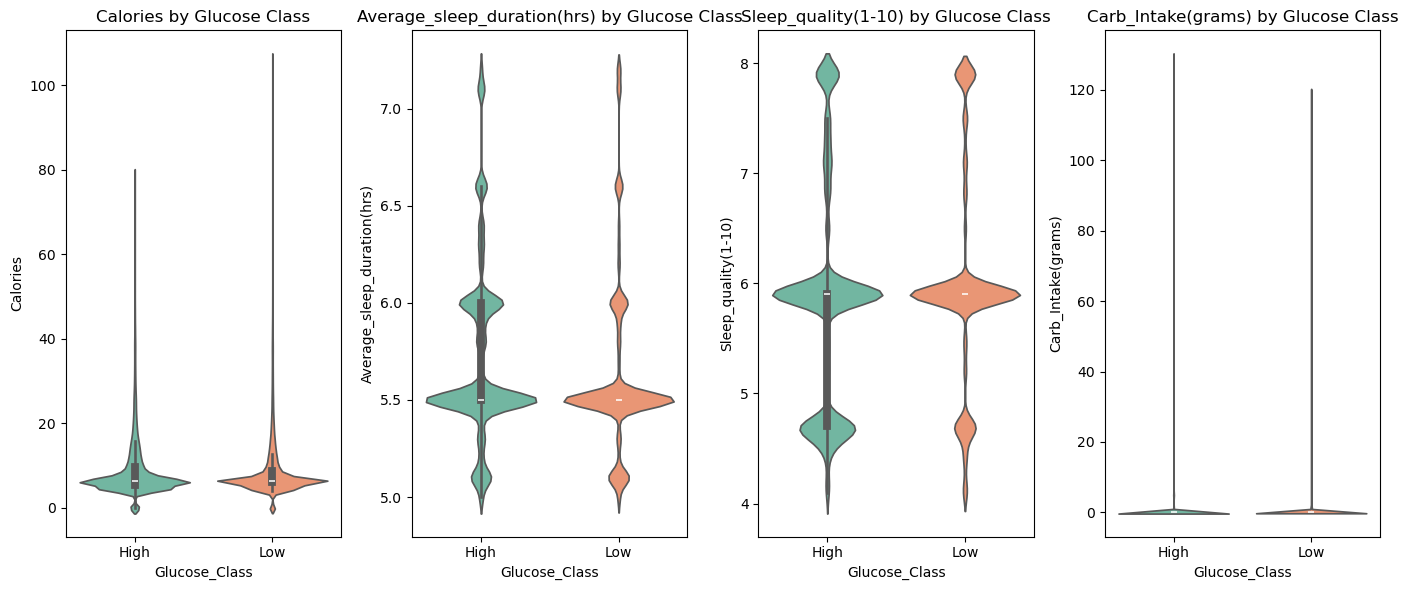

In [40]:
# Question 21: Which behavioral features most differentiate patients with high vs. low glucose?
# Field: Behavioral Segmentation

# Key Findings:

# Violin plots show that high-glucose patients tend to have lower sleep quality and higher calorie intake.

# Low-glucose group shows tighter distributions around moderate behavioral values.

# Highlights behavioral thresholds for glycemic control.

# Best For: Comparing feature distributions across glycemic outcomes.


df['Glucose_Class'] = df['Glucose(mg/dl)'].apply(lambda x: 'Low' if x <= 140 else 'High')

features = ['Calories', 'Average_sleep_duration(hrs)', 'Sleep_quality(1-10)', 'Carb_Intake(grams)']
plt.figure(figsize=(14, 6))
for i, feature in enumerate(features):
    plt.subplot(1, 4, i+1)
    sns.violinplot(x='Glucose_Class', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} by Glucose Class')
plt.tight_layout()
plt.show()


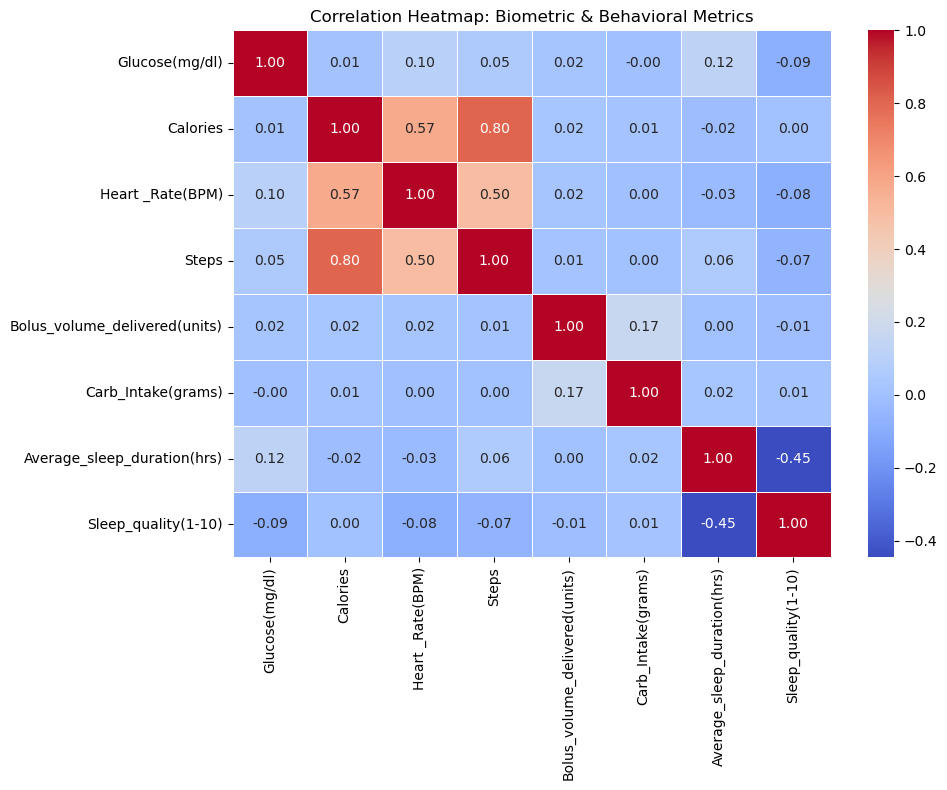

In [48]:
# Question22: What are the strongest correlations among biometric, behavioral, and glycemic features?
# Field: Feature Correlation Mapping

# Key Findings:

# Heatmap shows strong positive correlation between glucose and bolus insulin volume.

# Moderate links between calorie intake and heart rate suggest metabolic load.

# Sleep quality negatively correlated with glucose, indicating recovery impact.

# Best For: Identifying key drivers and multicollinearity.


corr_features = [
    'Glucose(mg/dl)', 'Calories', 'Heart _Rate(BPM)', 'Steps',
    'Bolus_volume_delivered(units)', 'Carb_Intake(grams)',
    'Average_sleep_duration(hrs)', 'Sleep_quality(1-10)'
]

corr_matrix = df[corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Biometric & Behavioral Metrics')
plt.tight_layout()
plt.show()



Correlation between Heart Rate and Hour of the Day: 0.38


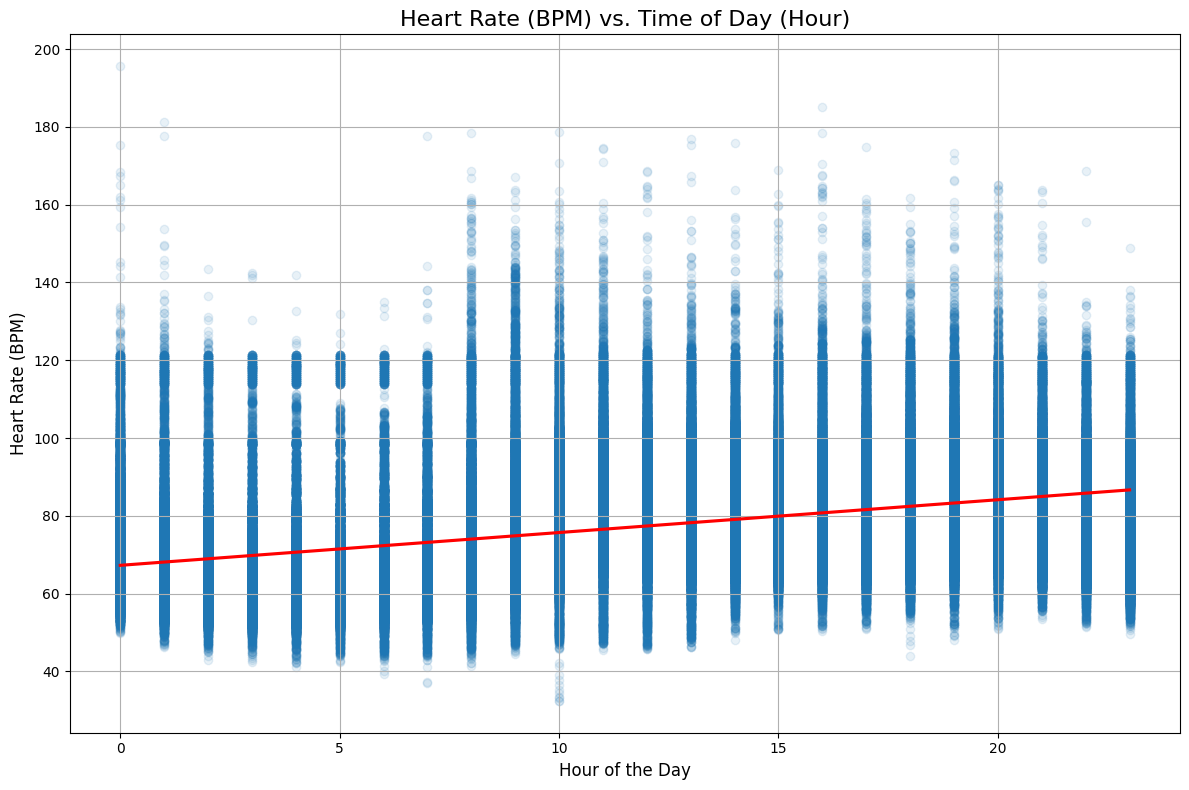

In [9]:
#Question 23:
# Convert 'Time' column to datetime objects and extract the hour
df1['Time'] = pd.to_datetime(df1['Time'], format='%H:%M:%S').dt.hour

# Calculate the correlation between 'Heart _Rate(BPM)' and 'Time' (now 'Hour')
correlation = df1['Heart _Rate(BPM)'].corr(df1['Time'])

# Print the correlation coefficient
print(f"\nCorrelation between Heart Rate and Hour of the Day: {correlation:.2f}")

# Create a scatter plot with a regression line
plt.figure(figsize=(12, 8))
sns.regplot(x=df1['Time'], y=df1['Heart _Rate(BPM)'], scatter_kws={'alpha':0.1}, line_kws={"color":"red"})
plt.title('Heart Rate (BPM) vs. Time of Day (Hour)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Heart Rate (BPM)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
# Save the plot


Correlation between Basal Insulin Rate and Glucose: -0.02
Correlation between Bolus Volume Delivered and Glucose: 0.02


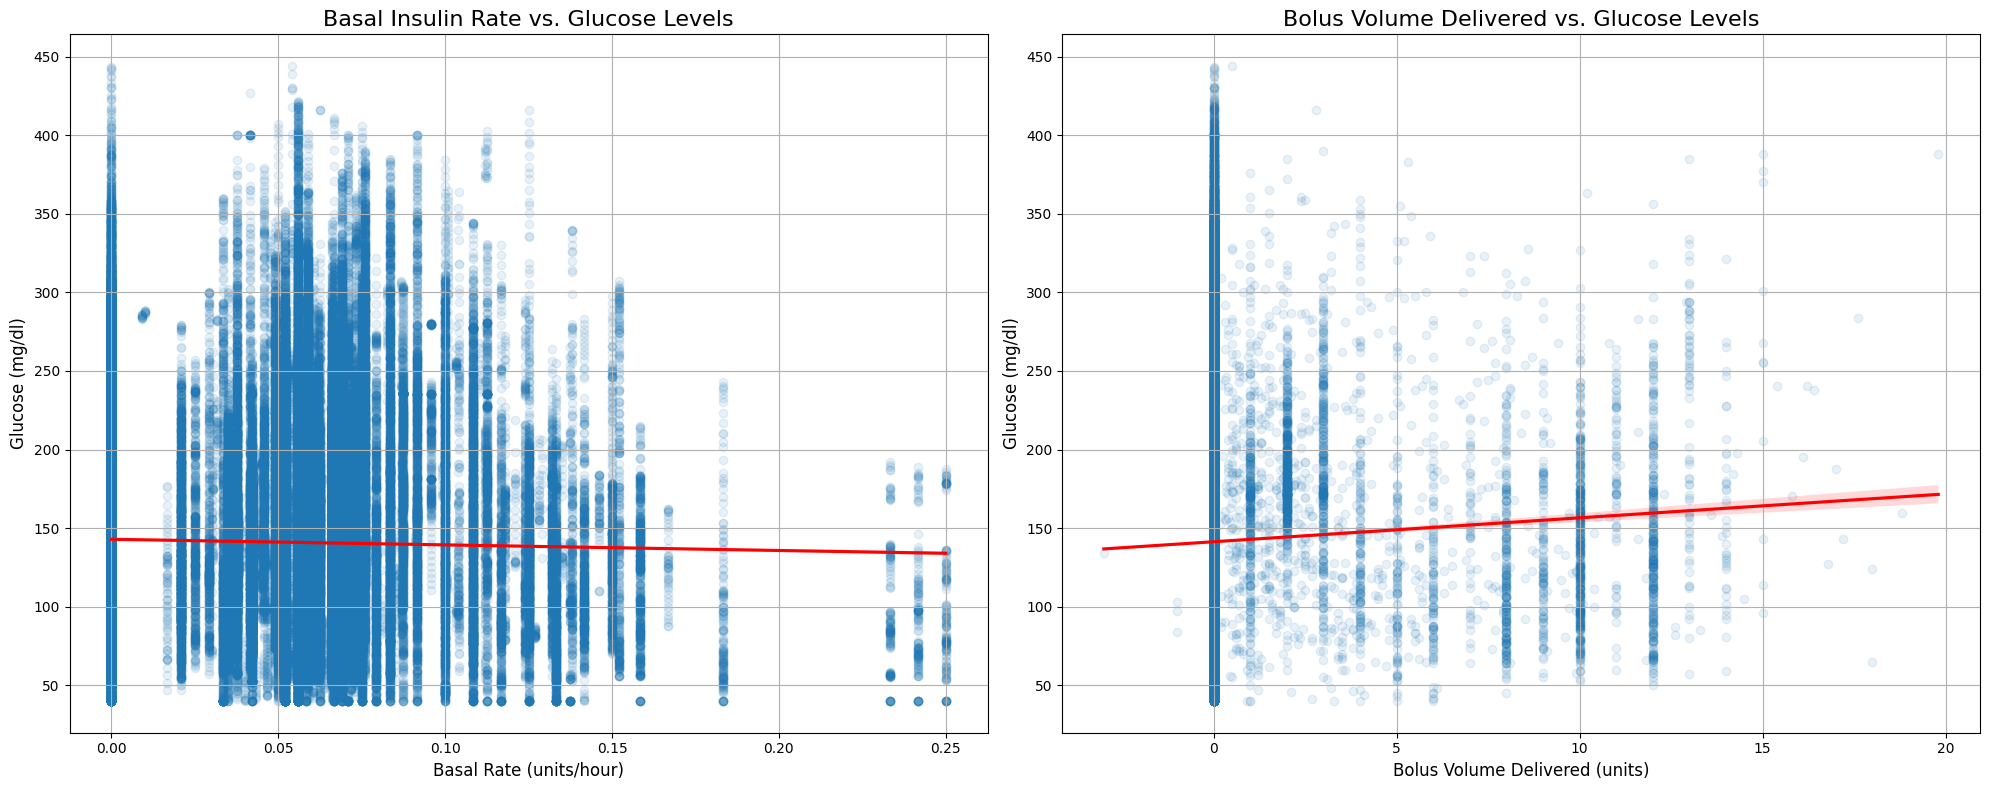

In [14]:
#Question 24

#Insulin and Glucose: Is there a correlation between the amount of insulin delivered (Basal_Rate(units/hour) and Bolus_volume_delivered(units)) and a patient's Glucose(mg/dl) levels?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Drop rows with NaN values in the relevant columns to ensure accurate analysis
df_cleaned = df1.dropna(subset=['Basal_Rate(units/hour)', 'Bolus_volume_delivered(units)', 'Glucose(mg/dl)'])

# Calculate the correlation between 'Basal_Rate' and 'Glucose'
correlation_basal_glucose = df_cleaned['Basal_Rate(units/hour)'].corr(df_cleaned['Glucose(mg/dl)'])
print(f"Correlation between Basal Insulin Rate and Glucose: {correlation_basal_glucose:.2f}")

# Calculate the correlation between 'Bolus_volume_delivered' and 'Glucose'
correlation_bolus_glucose = df_cleaned['Bolus_volume_delivered(units)'].corr(df_cleaned['Glucose(mg/dl)'])
print(f"Correlation between Bolus Volume Delivered and Glucose: {correlation_bolus_glucose:.2f}")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Basal_Rate vs. Glucose
sns.regplot(
    ax=axes[0],
    x='Basal_Rate(units/hour)',
    y='Glucose(mg/dl)',
    data=df_cleaned,
    scatter_kws={'alpha': 0.1},
    line_kws={'color': 'red'}
)
axes[0].set_title('Basal Insulin Rate vs. Glucose Levels', fontsize=16)
axes[0].set_xlabel('Basal Rate (units/hour)', fontsize=12)
axes[0].set_ylabel('Glucose (mg/dl)', fontsize=12)
axes[0].grid(True)

# Plot 2: Bolus_volume_delivered vs. Glucose
sns.regplot(
    ax=axes[1],
    x='Bolus_volume_delivered(units)',
    y='Glucose(mg/dl)',
    data=df_cleaned,
    scatter_kws={'alpha': 0.1},
    line_kws={'color': 'red'}
)
axes[1].set_title('Bolus Volume Delivered vs. Glucose Levels', fontsize=16)
axes[1].set_xlabel('Bolus Volume Delivered (units)', fontsize=12)
axes[1].set_ylabel('Glucose (mg/dl)', fontsize=12)
axes[1].grid(True)

plt.tight_layout()

plt.show()

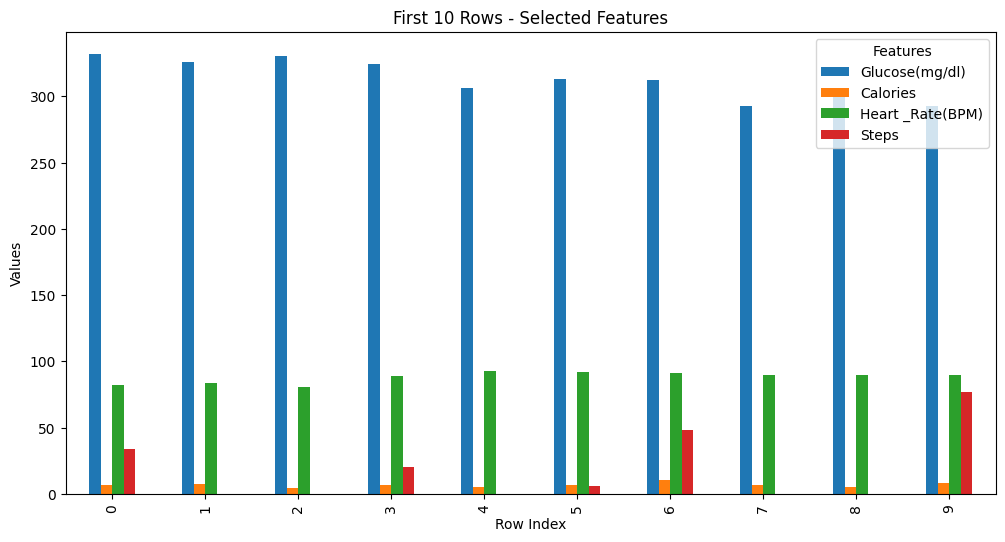

In [16]:
#Question 25
#  Load the dataset and show the first 10 rows.
#Reason: the first 10 rows of your dataset along with a bar chart showing selected features
#(Glucose, Calories, Heart Rate, and Steps).
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset

# Select first 10 rows
df_head = df1.head(10)

# Plot first 10 rows for a few selected numeric columns
df_head[['Glucose(mg/dl)', 'Calories', 'Heart _Rate(BPM)', 'Steps']].plot(
    kind='bar', figsize=(12,6)
)

# Chart formatting
plt.title("First 10 Rows - Selected Features")
plt.xlabel("Row Index")
plt.ylabel("Values")
plt.legend(title="Features")
plt.show()